<a href="https://colab.research.google.com/github/shshahul/MLProject_1_DemandForecast/blob/main/Demand_Forecasting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for data reading and Manupulation
import numpy as np
import pandas as pd

#for data visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

#for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/train 2.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
# i want to know the number of rows and columns
df.shape

(913000, 4)

In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

#Checking and Handling Missing Values

Checking for missing values

In [ ]:
#checking for the null values
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

In [ ]:
df.dtypes



date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
pd.DataFrame(df.isnull().sum()).T

,date,store,item,sales
0,0,0,0,0


It is observed that the data-type of date column are not exactly the right data-type suitable for those corresponding columns: 
>  The data type of columns date is'string' but should be of 'datetime'.

In [ ]:
#correcting data type of column date
df['date']=pd.to_datetime(df['date'])


In [ ]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [ ]:
# First and last dates in the dataset
df['date'].min(),  df['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [ ]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [ ]:
#to view the basic statstical details about the data
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [ ]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Let's calculate the total daily, monthly and annual sales

In [ ]:
from datetime import datetime, timedelta, date

In [ ]:
for_day = df.date.apply(lambda x: str(x)[:-9])
for_day

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: date, Length: 913000, dtype: object

In [ ]:
for_month = df.date.apply(lambda x: str(x)[:-12])
for_month

0         2013-01
1         2013-01
2         2013-01
3         2013-01
4         2013-01
           ...   
912995    2017-12
912996    2017-12
912997    2017-12
912998    2017-12
912999    2017-12
Name: date, Length: 913000, dtype: object

In [ ]:
for_year = df.date.apply(lambda x:str(x)[:4])
for_year

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
912995    2017
912996    2017
912997    2017
912998    2017
912999    2017
Name: date, Length: 913000, dtype: object

In [ ]:
def sales_D_M_or_Y(df, time=["daily", 'monthly','yearly']):
    df= df.copy()
    if time == "daily":
        df.date= df.date.apply(lambda x: str(x)[:-9])
    elif time == "monthly":
        # Drop the day and hour indicators from the date column:
        df.date= df.date.apply(lambda x: str(x)[:-12])
    else:
        df.date= df.date.apply(lambda x: str(x)[:4])
        
   
    df= df.groupby('date')['sales'].sum().reset_index()
    df.date= pd.to_datetime(df.date)
        
    return df

In [ ]:
df_daily =sales_D_M_or_Y(df,"daily")
df_daily.head()

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


In [ ]:
df_month =sales_D_M_or_Y(df,"monthly")
df_month.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


In [ ]:
df_year =sales_D_M_or_Y(df,"yearly")
df_year.head()

,date,sales
0,2013-01-01,7941243
1,2014-01-01,9135482
2,2015-01-01,9536887
3,2016-01-01,10357160
4,2017-01-01,10733740


In [ ]:
df_year.shape

(5, 2)

In [ ]:
df_daily = df_daily.set_index('date')

#EDA

<AxesSubplot:xlabel='date'>

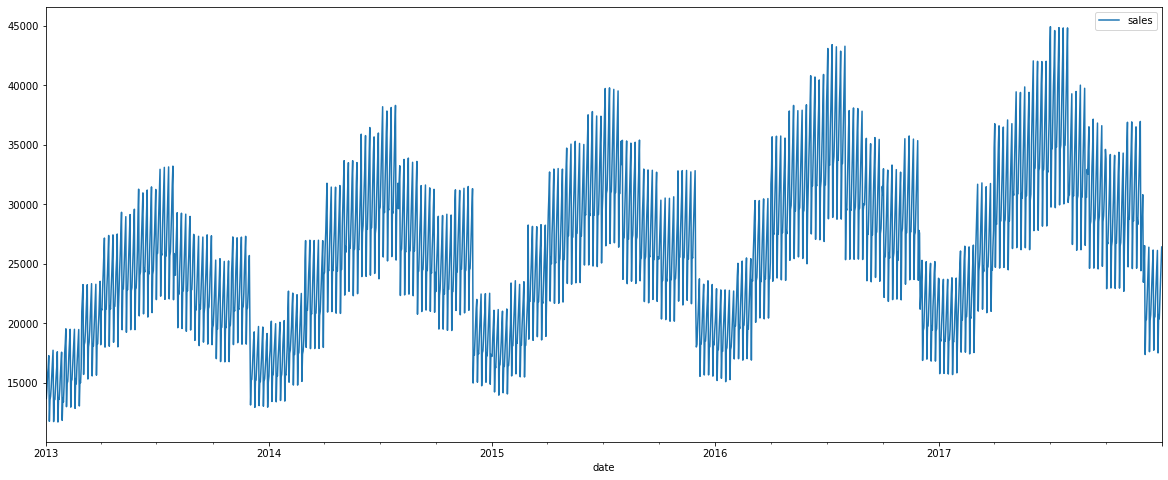

In [ ]:
df_daily.plot(figsize = (20,8))

In [ ]:
df_month = df_month.set_index('date')

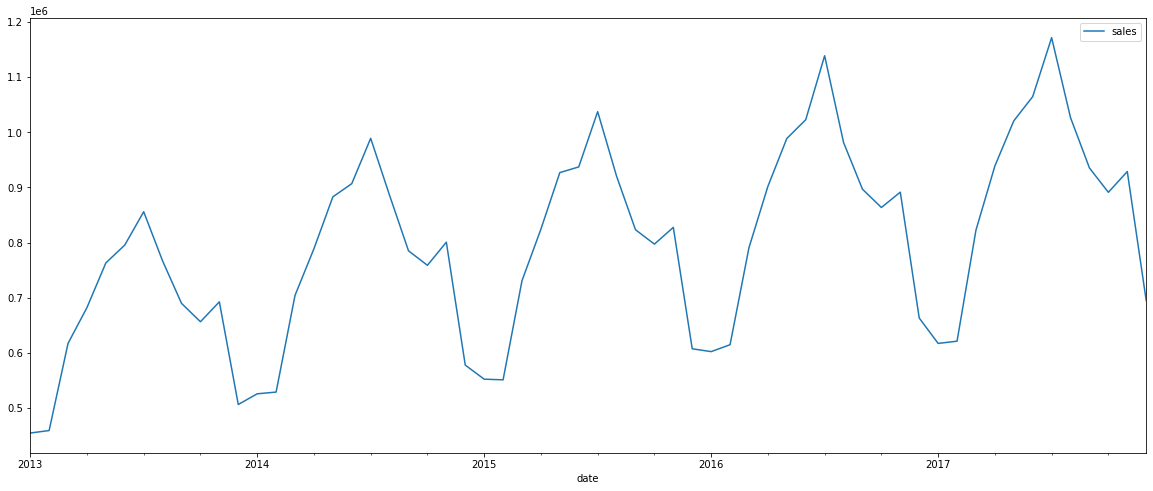

In [ ]:
df_month = df_month.plot(figsize=(20,8))

In [ ]:
df_year = df_year.set_index('date')

<AxesSubplot:xlabel='date'>

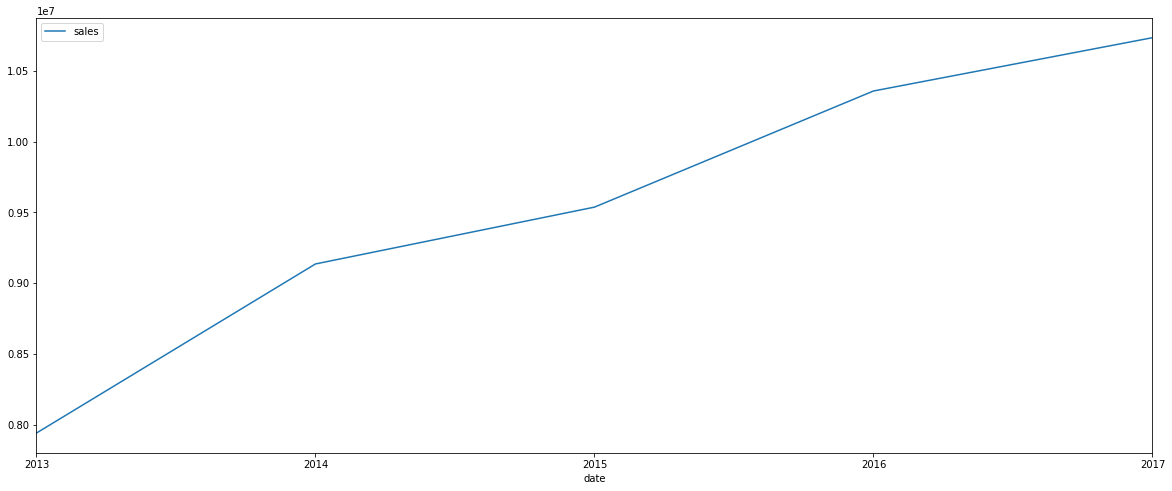

In [ ]:
df_year.plot(figsize=(20,8))

#Feture Engineering
**Datetime** **featues**
datetime fetures are the fetures created from stamp value of each creation

In [ ]:
def create_date_time_feature(df):

  df = df.copy()
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month']=df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week.astype("int64")
  return df

In [ ]:
df2 = create_date_time_feature(df_daily)
df2

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2013-01-01,13696,1,1,1,2013,1,1,1
2013-01-02,13678,2,1,1,2013,2,2,1
2013-01-03,14488,3,1,1,2013,3,3,1
2013-01-04,15677,4,1,1,2013,4,4,1
2013-01-05,16237,5,1,1,2013,5,5,1
...,...,...,...,...,...,...,...,...
2017-12-27,20378,2,4,12,2017,361,27,52
2017-12-28,21885,3,4,12,2017,362,28,52
2017-12-29,23535,4,4,12,2017,363,29,52


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sales       1826 non-null   int64
 1   dayofweek   1826 non-null   int64
 2   quarter     1826 non-null   int64
 3   month       1826 non-null   int64
 4   year        1826 non-null   int64
 5   dayofyear   1826 non-null   int64
 6   dayofmonth  1826 non-null   int64
 7   weekofyear  1826 non-null   int64
dtypes: int64(8)
memory usage: 128.4 KB


#Lag features 
Lag or shifted features are a commonly used feature engineering technique for time series forecasting. Lag features involve shifting the time series data by a specified number of time steps and using the shifted values as input features for the forecasting model.

Lag features can be created for multiple lags, such as a lag of 1, 2, 3, etc. The choice of how many lags to include and which lags to include depends on the characteristics of the time series data and the goals of the forecasting. It is also possible to create lag features for other related variables, such as prices, competitor data, etc.

In [ ]:
df3 = df2.copy()

In [ ]:
#adding difference in sales

In [ ]:
def add_diff(df,diff_column):
  df['prev_sales'] = df[diff_column].shift(1)
  df['diff'] = (df[diff_column]-df['prev_sales'])
  return df

In [ ]:
add_diff(df3,'sales')

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prev_sales,diff
date,,,,,,,,,,
2013-01-01,13696,1,1,1,2013,1,1,1,NaN,NaN
2013-01-02,13678,2,1,1,2013,2,2,1,13696.0,-18.0
2013-01-03,14488,3,1,1,2013,3,3,1,13678.0,810.0
2013-01-04,15677,4,1,1,2013,4,4,1,14488.0,1189.0
2013-01-05,16237,5,1,1,2013,5,5,1,15677.0,560.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,20378,2,4,12,2017,361,27,52,20738.0,-360.0
2017-12-28,21885,3,4,12,2017,362,28,52,20378.0,1507.0
2017-12-29,23535,4,4,12,2017,363,29,52,21885.0,1650.0


In [ ]:
#Adding lag values

In [ ]:
df4 = df3.copy()

In [ ]:
from dateutil.relativedelta import relativedelta, MO

In [ ]:
def add_lag_columns(df):
  total_years = relativedelta(df.index.max(),df.index.min()).years
  for column in range(1,total_years+1):
    column_name = "lag_" + str(column)
    df[column_name] = ""
    df[column_name] = pd.to_numeric(df[column_name])

In [ ]:
add_lag_columns(df4)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales       1826 non-null   int64  
 1   dayofweek   1826 non-null   int64  
 2   quarter     1826 non-null   int64  
 3   month       1826 non-null   int64  
 4   year        1826 non-null   int64  
 5   dayofyear   1826 non-null   int64  
 6   dayofmonth  1826 non-null   int64  
 7   weekofyear  1826 non-null   int64  
 8   prev_sales  1825 non-null   float64
 9   diff        1825 non-null   float64
 10  lag_1       0 non-null      float64
 11  lag_2       0 non-null      float64
 12  lag_3       0 non-null      float64
 13  lag_4       0 non-null      float64
dtypes: float64(6), int64(8)
memory usage: 214.0 KB


#Adding lag values.

In [ ]:
def add_lag_values(df, target):
    for count in range(0, len(df.index)):
        for column in ["lag_1", "lag_2", "lag_3", "lag_4"]:
            if column=="lag_1":
                startValue= df.iloc[count,  list(df.columns).index(target)]
                date= df.index[count] - relativedelta(years=1)#same day 1 year ago
                if date>=df.index.min():
                    pValue  = df.loc[date][list(df.columns).index(target)]
                    df.iloc[count, list(df.columns).index(column)]= pValue
                else:
                    break

In [ ]:
def add_lag_values(df,target):
  for count in range (0,len(df.index)):
    for column in ['lag_1','lag_2','lag_3','lag_4']:
      if column == 'lag_1':
        #startValue= df.iloc[count,  list(df.columns).index(target)]
        date = df.index[count] - relativedelta(years=1)
        if date>=df.index.min():
          Value = df.loc[date][list(df.columns).index(target)] 
          df.iloc[count, list(df.columns).index(column)]= Value
        else:
          break
      elif column=="lag_2":
                #startValue= df.iloc[count,  list(df.columns).index(target)]
                date= df.index[count] - relativedelta(years=2)#same day 2 years ago
                if date>=df.index.min():
                    Value  = df.loc[date][list(df.columns).index(target)]
                    df.iloc[count, list(df.columns).index(column)]= Value
                else:
                    break
      elif column=="lag_3":
                #startValue= df.iloc[count,  list(df.columns).index(target)]
                date= df.index[count] - relativedelta(years=3)
                if date>=df.index.min():
                    Value  = df.loc[date][list(df.columns).index(target)]
                    df.iloc[count, list(df.columns).index(column)]= Value
                else:
                    break
      else:
                #startValue= df.iloc[count,  list(df.columns).index(target)]
                date= df.index[count] - relativedelta(years=4)
                if date>=df.index.min():
                    Value  = df.loc[date][list(df.columns).index(target)]
                    df.iloc[count, list(df.columns).index(column)]= Value
                else:
                    break
  return df                                     



In [ ]:
%%time
add_lag_values(df4, "sales")

CPU times: user 2.23 s, sys: 43.5 ms, total: 2.28 s
Wall time: 2.23 s


,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prev_sales,diff,lag_1,lag_2,lag_3,lag_4
date,,,,,,,,,,,,,,
2013-01-01,13696,1,1,1,2013,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,13678,2,1,1,2013,2,2,1,13696.0,-18.0,NaN,NaN,NaN,NaN
2013-01-03,14488,3,1,1,2013,3,3,1,13678.0,810.0,NaN,NaN,NaN,NaN
2013-01-04,15677,4,1,1,2013,4,4,1,14488.0,1189.0,NaN,NaN,NaN,NaN
2013-01-05,16237,5,1,1,2013,5,5,1,15677.0,560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,20378,2,4,12,2017,361,27,52,20738.0,-360.0,19341.0,23268.0,21317.0,17047.0
2017-12-28,21885,3,4,12,2017,362,28,52,20378.0,1507.0,19560.0,15569.0,22532.0,18433.0
2017-12-29,23535,4,4,12,2017,363,29,52,21885.0,1650.0,21111.0,18403.0,14888.0,19148.0


In [ ]:
#some checks
df4.loc["2013-12-31"]["sales"]==df4.loc["2017-12-31"]["lag_4"]

True

In [ ]:
df4.loc["2014-12-31"]["sales"]==df4.loc["2017-12-31"]["lag_3"]

True

In [ ]:
df4.loc["2015-12-31"]["sales"]==df4.loc["2017-12-31"]["lag_2"]

True

In [ ]:
df4.loc["2016-12-31"]["sales"]==df4.loc["2017-12-31"]["lag_1"]

True

# creating a dataframe for forcasting

In [ ]:
df_model= df4.drop(['prev_sales'], axis=1)
df_model

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4
date,,,,,,,,,,,,,
2013-01-01,13696,1,1,1,2013,1,1,1,NaN,NaN,NaN,NaN,NaN
2013-01-02,13678,2,1,1,2013,2,2,1,-18.0,NaN,NaN,NaN,NaN
2013-01-03,14488,3,1,1,2013,3,3,1,810.0,NaN,NaN,NaN,NaN
2013-01-04,15677,4,1,1,2013,4,4,1,1189.0,NaN,NaN,NaN,NaN
2013-01-05,16237,5,1,1,2013,5,5,1,560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,20378,2,4,12,2017,361,27,52,-360.0,19341.0,23268.0,21317.0,17047.0
2017-12-28,21885,3,4,12,2017,362,28,52,1507.0,19560.0,15569.0,22532.0,18433.0
2017-12-29,23535,4,4,12,2017,363,29,52,1650.0,21111.0,18403.0,14888.0,19148.0


In [ ]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales       1826 non-null   int64  
 1   dayofweek   1826 non-null   int64  
 2   quarter     1826 non-null   int64  
 3   month       1826 non-null   int64  
 4   year        1826 non-null   int64  
 5   dayofyear   1826 non-null   int64  
 6   dayofmonth  1826 non-null   int64  
 7   weekofyear  1826 non-null   int64  
 8   diff        1825 non-null   float64
 9   lag_1       1461 non-null   float64
 10  lag_2       1096 non-null   float64
 11  lag_3       731 non-null    float64
 12  lag_4       365 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 264.3 KB


#Splitting Train and Test

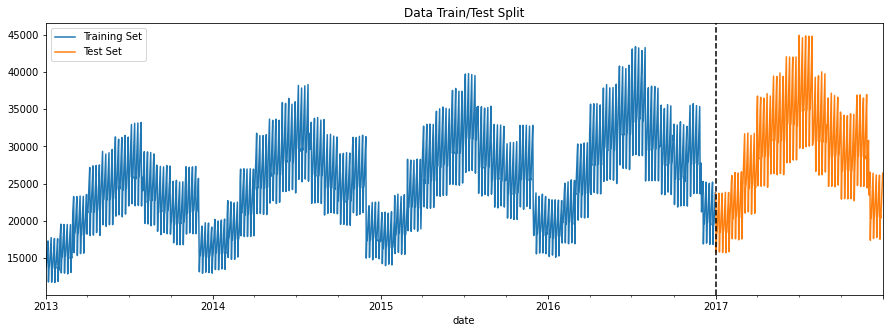

In [ ]:
train= df_model.loc[df_model.index < '2017-01-01']
test = df_model.loc[df_model.index >= '2017-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
df_daily.loc[df_daily.index < '2017-01-01'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_daily.loc[df_daily.index >= '2017-01-01'].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

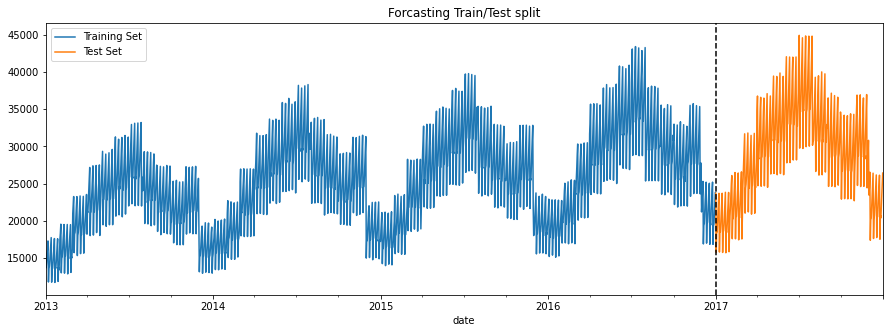

In [ ]:
train = df_model.loc[df_model.index <'2017-01-01']
test = df_model.loc[df_model.index >='2017-01-01']

fig, ax = plt.subplots(figsize=(15,5))
df_daily.loc[df_daily.index < '2017-01-01'].plot(ax=ax, label = 'Training Set', title='Forcasting Train/Test split')
df_daily.loc[df_daily.index >= '2017-01-01'].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [ ]:
df_model.columns

Index(['sales', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'diff', 'lag_1', 'lag_2', 'lag_3', 'lag_4'],
      dtype='object')

In [ ]:
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'diff', 'lag_1', 'lag_2', 'lag_3', 'lag_4']

TARGET = 'sales'

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#Building and Running XGB Regressor

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(random_state=51)

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

In [ ]:
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)

[05:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:23478.9	validation_1-rmse:27252.6
[99]	validation_0-rmse:429.208	validation_1-rmse:1343.02


XGBRegressor(random_state=51)

In [ ]:
from time import time

In [ ]:
%%time
start = time()

model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)], verbose=100)

train_time = time()-start

start = time()

y_pred = model.predict (X_test)

predict_time = time()-start

print(model)
print("\t Training Time: %0.3fs" % train_time )
print("\t Prediction Time: %0.3fs" % predict_time)
print("\t Explained variance score: ",explained_variance_score(y_test,y_pred))
print("\t Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("\t Mean Squared Error: ",mean_squared_error(y_test,y_pred))

print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("\tR2 Score (RMSE):", r2_score(y_test, y_pred))

print()



[04:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:23478.9	validation_1-rmse:27252.6
[99]	validation_0-rmse:429.208	validation_1-rmse:1343.02
XGBRegressor(random_state=51)
	 Training Time: 0.268s
	 Prediction Time: 0.003s
	 Explained variance score:  0.961241593656649
	 Mean Absolute Error:  1034.5194402825343
	 Mean Squared Error:  1803693.244972966
	Root Mean squared error (RMSE): 1343.0164723386551
	R2 Score (RMSE): 0.9573753733562096

CPU times: user 270 ms, sys: 5.11 ms, total: 275 ms
Wall time: 276 ms


explained varience is close to 1

so taking explained varience as evalution metrics

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation_score = round(np.mean(cross_val_score(model,X_train,y_train, cv=10)),3)
cross_validation_score

[04:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.885

#Using our best model

In [ ]:
best_model = xgb.XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_dept = 3, n_estimators=1000)



In [ ]:
best_model= xgb.XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

start = time()
best_model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)
train_time = time() - start
start = time()
y_pred = best_model.predict(X_test)
predict_time = time()-start    
print(best_model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, y_pred))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("\tR2 score:", r2_score(y_test, y_pred))
print()


[05:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:23519.1	validation_1-rmse:27293.5
[100]	validation_0-rmse:422.252	validation_1-rmse:984.534
[200]	validation_0-rmse:279.608	validation_1-rmse:912.657
[300]	validation_0-rmse:224.476	validation_1-rmse:905.36
[400]	validation_0-rmse:194.447	validation_1-rmse:898.799
[500]	validation_0-rmse:172	validation_1-rmse:896.674
[600]	validation_0-rmse:155.593	validation_1-rmse:895.004
[700]	validation_0-rmse:143.026	validation_1-rmse:896.799
[800]	validation_0-rmse:132.066	validation_1-rmse:893.071
[900]	validation_0-rmse:121.594	validation_1-rmse:891.196
[999]	validation_0-rmse:112.885	validation_1-rmse:891.836
XGBRegressor(colsample_bytree=0.3, n_estimators=1000)
	Training time: 2.587s
	Prediction time: 0.015s
	Explained variance: 0.9916556988701846
	Mean absolute error (MAE): 753.7446008133562
	Root Mean squared error (RMSE): 891.8355688079398
	R2

#Metric Evolution 

  Explained variance: 0.9916556988701846

	Mean absolute error (MAE): 753.7446008133562

	Root Mean squared error (RMSE): 891.8355688079398

	R2 score: 0.9812039112253449


In [ ]:
#Explained variance: 0.9916556988701846 is almost equal to one 

<ipython-input-76-34b819ff2a7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = best_model.predict(X_test)


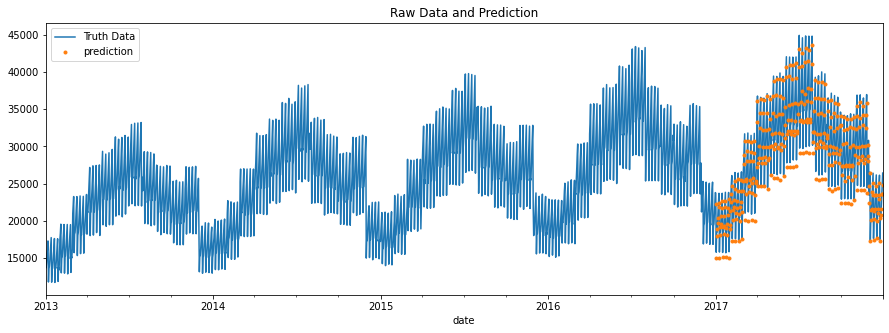

In [ ]:
#Testing model on data prediction
test['prediction'] = best_model.predict(X_test)

df_result = df_model.merge(test[['prediction']], how='left',left_index=True, right_index=True)
ax = df_result[['sales']].plot(figsize = (15,5))
df_result['prediction'].plot(ax=ax,style=".")
plt.legend(['Truth Data','prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
df_result

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4,prediction
date,,,,,,,,,,,,,,
2013-01-01,13696,1,1,1,2013,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,13678,2,1,1,2013,2,2,1,-18.0,NaN,NaN,NaN,NaN,NaN
2013-01-03,14488,3,1,1,2013,3,3,1,810.0,NaN,NaN,NaN,NaN,NaN
2013-01-04,15677,4,1,1,2013,4,4,1,1189.0,NaN,NaN,NaN,NaN,NaN
2013-01-05,16237,5,1,1,2013,5,5,1,560.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,20378,2,4,12,2017,361,27,52,-360.0,19341.0,23268.0,21317.0,17047.0,20774.962891
2017-12-28,21885,3,4,12,2017,362,28,52,1507.0,19560.0,15569.0,22532.0,18433.0,21562.644531
2017-12-29,23535,4,4,12,2017,363,29,52,1650.0,21111.0,18403.0,14888.0,19148.0,23599.380859


#Feature Importance

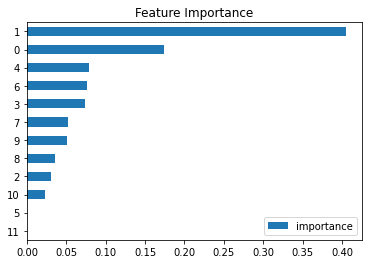

In [ ]:
imp_feature = pd.DataFrame(data = best_model.feature_importances_,
                           #index = model.feature_names_in_,
                           columns = ['importance'])
imp_feature.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.legend(loc='lower right')
plt.show()

In [ ]:
best_model.feature_importances_

array([1.7414048e-01, 4.0493399e-01, 3.0671548e-02, 7.3902726e-02,
       7.8508019e-02, 3.3406320e-04, 7.6175466e-02, 5.1833224e-02,
       3.5872888e-02, 5.0246429e-02, 2.3380997e-02, 0.0000000e+00],
      dtype=float32)

#Forecasting the future sales

In [ ]:
df_daily.index.max()

Timestamp('2017-12-31 00:00:00')

In [ ]:
future = pd.date_range(df_daily.index.max()+relativedelta(days = 1),
                       df_daily.index.max()+relativedelta(months = 3),
                       freq = '1d')
future_df_M = pd.DataFrame(index=future)
future_df_M

""
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
...
2018-03-27
2018-03-28
2018-03-29
2018-03-30


In [ ]:
future_df_M['isFuture'] = True
df_model['isFuture'] = False
df_future_model = pd.concat([df_model,future_df_M])
df_future_model

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4,isFuture
2013-01-01,13696.0,1.0,1.0,1.0,2013.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,False
2013-01-02,13678.0,2.0,1.0,1.0,2013.0,2.0,2.0,1.0,-18.0,NaN,NaN,NaN,NaN,False
2013-01-03,14488.0,3.0,1.0,1.0,2013.0,3.0,3.0,1.0,810.0,NaN,NaN,NaN,NaN,False
2013-01-04,15677.0,4.0,1.0,1.0,2013.0,4.0,4.0,1.0,1189.0,NaN,NaN,NaN,NaN,False
2013-01-05,16237.0,5.0,1.0,1.0,2013.0,5.0,5.0,1.0,560.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2018-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2018-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
#Again feture engineering
df_future_model = create_date_time_feature(df_future_model)
df_future_model

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4,isFuture
2013-01-01,13696.0,1,1,1,2013,1,1,1,NaN,NaN,NaN,NaN,NaN,False
2013-01-02,13678.0,2,1,1,2013,2,2,1,-18.0,NaN,NaN,NaN,NaN,False
2013-01-03,14488.0,3,1,1,2013,3,3,1,810.0,NaN,NaN,NaN,NaN,False
2013-01-04,15677.0,4,1,1,2013,4,4,1,1189.0,NaN,NaN,NaN,NaN,False
2013-01-05,16237.0,5,1,1,2013,5,5,1,560.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,NaN,1,1,3,2018,86,27,13,NaN,NaN,NaN,NaN,NaN,True
2018-03-28,NaN,2,1,3,2018,87,28,13,NaN,NaN,NaN,NaN,NaN,True
2018-03-29,NaN,3,1,3,2018,88,29,13,NaN,NaN,NaN,NaN,NaN,True
2018-03-30,NaN,4,1,3,2018,89,30,13,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
df_future_model = add_lag_values(df_future_model,'sales')
df_future_model

,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4,isFuture
2013-01-01,13696.0,1,1,1,2013,1,1,1,NaN,NaN,NaN,NaN,NaN,False
2013-01-02,13678.0,2,1,1,2013,2,2,1,-18.0,NaN,NaN,NaN,NaN,False
2013-01-03,14488.0,3,1,1,2013,3,3,1,810.0,NaN,NaN,NaN,NaN,False
2013-01-04,15677.0,4,1,1,2013,4,4,1,1189.0,NaN,NaN,NaN,NaN,False
2013-01-05,16237.0,5,1,1,2013,5,5,1,560.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,NaN,1,1,3,2018,86,27,13,NaN,21013.0,30491.0,24810.0,22387.0,True
2018-03-28,NaN,2,1,3,2018,87,28,13,NaN,24693.0,20448.0,26389.0,23942.0,True
2018-03-29,NaN,3,1,3,2018,88,29,13,NaN,24474.0,23688.0,28255.0,25452.0,True
2018-03-30,NaN,4,1,3,2018,89,30,13,NaN,26393.0,23769.0,18910.0,26951.0,True


In [ ]:
future_sales= df_future_model.query('isFuture').copy()
future_sales


,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,diff,lag_1,lag_2,lag_3,lag_4,isFuture
2018-01-01,NaN,0,1,1,2018,1,1,1,NaN,23709.0,20158.0,17226.0,15556.0,True
2018-01-02,NaN,1,1,1,2018,2,2,1,NaN,15772.0,21280.0,18719.0,17033.0,True
2018-01-03,NaN,2,1,1,2018,3,3,1,NaN,18650.0,22911.0,19798.0,17746.0,True
2018-01-04,NaN,3,1,1,2018,4,4,1,NaN,18510.0,15199.0,21101.0,19184.0,True
2018-01-05,NaN,4,1,1,2018,5,5,1,NaN,19895.0,17806.0,14235.0,20182.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,NaN,1,1,3,2018,86,27,13,NaN,21013.0,30491.0,24810.0,22387.0,True
2018-03-28,NaN,2,1,3,2018,87,28,13,NaN,24693.0,20448.0,26389.0,23942.0,True
2018-03-29,NaN,3,1,3,2018,88,29,13,NaN,24474.0,23688.0,28255.0,25452.0,True
2018-03-30,NaN,4,1,3,2018,89,30,13,NaN,26393.0,23769.0,18910.0,26951.0,True


In [ ]:
future_sales['forecast'] = best_model.predict(future_sales[FEATURES])
future_sales['forecast']

2018-01-01    17351.392578
2018-01-02    17742.859375
2018-01-03    18951.701172
2018-01-04    18970.443359
2018-01-05    20731.203125
                  ...     
2018-03-27    24163.873047
2018-03-28    25003.888672
2018-03-29    25578.033203
2018-03-30    26790.605469
2018-03-31    28734.628906
Name: forecast, Length: 90, dtype: float32

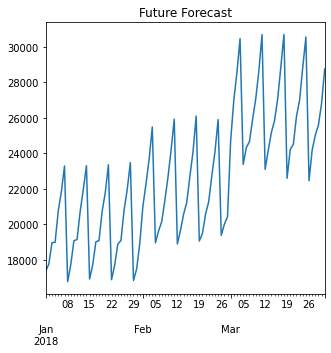

In [ ]:
future_sales['forecast'].plot(figsize=(5, 5),
                                   title='Future Forecast')
plt.show()